# Predicción de suscripción a préstamo de largo plazo

## En construcción...

## Nicolás Echeverri Rojas

### Información de las variables del dataset

   #### bank client data:
   1 - age (numeric)
  
   2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student",
                                       "blue-collar","self-employed","retired","technician","services") 
                                       
                                       
   3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)
   
   
   4 - education (categorical: "unknown","secondary","primary","tertiary")
   
  Tertiary education refers to all formal post-secondary education, including public and private universities,   colleges, technical training institutes, and vocational schools
   
   5 - default: has credit in default? (binary: "yes","no")
   
   6 - balance: average yearly balance, in euros (numeric) 
   
   7 - housing: has housing loan? (binary: "yes","no")
   
   8 - loan: has personal loan? (binary: "yes","no")
   
   
   
   #### related with the last contact of the current campaign:
   9 - contact: contact communication type (categorical: "unknown","telephone","cellular") 
   
  10 - day: last contact day of the month (numeric)
  
  11 - month: last contact month of year (categorical: "jan", "feb", "mar", ..., "nov", "dec")
  
  12 - duration: last contact duration, in seconds (numeric)
  
   #### other attributes:
  13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
  
 
  14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)
  
  
  15 - previous: number of contacts performed before this campaign and for this client (numeric)
  
  
  16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")

  #### Output variable (desired target):
  17 - y - has the client subscribed a term deposit? (binary: "yes","no")
  
  
## The classification goal is to predict if the client will subscribe a term deposit (variable y).

dataset tomado de: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

## 1) Carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\nicolas\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\nicolas\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\nicolas\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


In [2]:
df=pd.read_csv("bank-full.csv", sep=";")

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


Cambiando los headers de las columnas para mejor compresión

In [88]:
df.columns=['age', 'job', 'marital', 'education', 'default credit card', 'balance', 'housing loan',
       'personal loan', 'call type', 'call day', 'call month', 'call duration', 'number of calls',
        'number of days since previous call','number of previous calls', 'outcome previous campaign', 'suscribed']

df.tail()

,age,job,marital,education,default credit card,balance,housing loan,personal loan,call type,call day,call month,call duration,number of calls,number of days since previous call,number of previous calls,outcome previous campaign,suscribed
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,456,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,1127,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,508,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,0,2971,0,0,cellular,17,nov,361,2,188,11,other,0


In [89]:
df['call duration']=df['call duration']/60

### Estructura, tipo y tamaño de los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   age                                 45211 non-null  int64 
 1   job                                 45211 non-null  object
 2   marital                             45211 non-null  object
 3   education                           45211 non-null  object
 4   default credit card                 45211 non-null  object
 5   balance                             45211 non-null  int64 
 6   housing loan                        45211 non-null  object
 7   personal loan                       45211 non-null  object
 8   call type                           45211 non-null  object
 9   call day                            45211 non-null  int64 
 10  call month                          45211 non-null  object
 11  call duration                       45211 non-null  in

Se observa que la mayoría de datos son tipo objeto y que no existen datos nulos

## 2) Análisis exploratorio de los datos

In [6]:
df.describe()

,age,balance,call day,call duration,number of calls,number of days since previous call,number of previous calls
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


No se observa que haya valores anormales en el dataframe

### 2.1) Análisis variable objetivo-variables categóricas

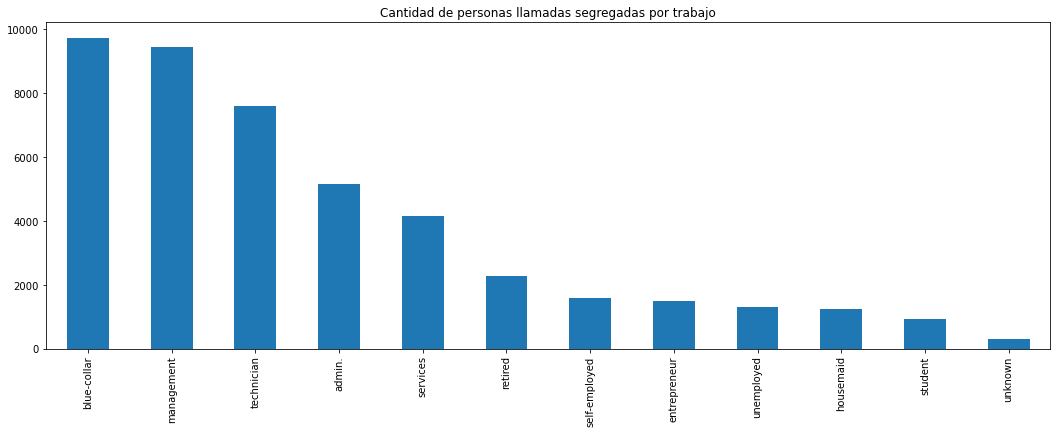

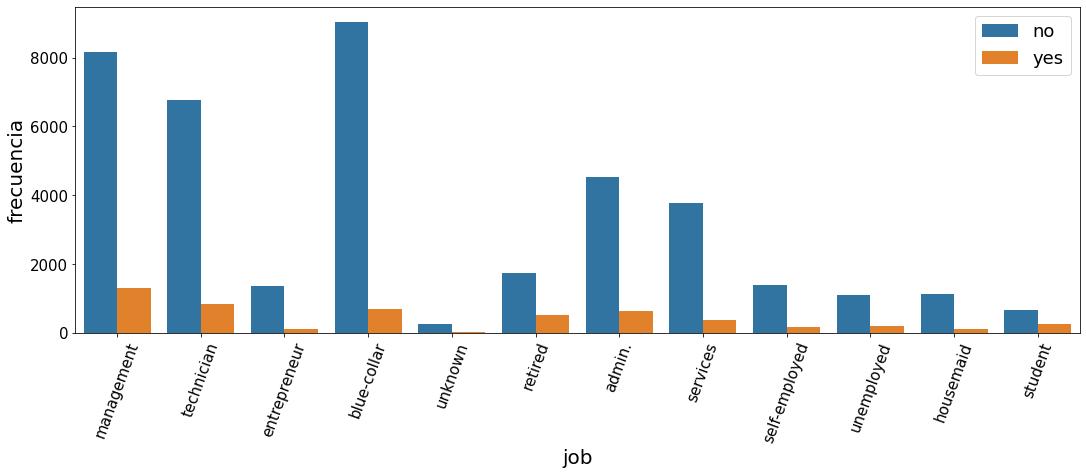

In [7]:
plt.figure(figsize=(18,6))
df['job'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas segregadas por trabajo')
plt.show()
plt.close()



plt.figure(figsize=(18,6))
chart=sns.countplot(x='job', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.xlabel('job', fontsize = 20)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [8]:
def df_percentage(df, segregador):
    df_pivot = pd.pivot_table(df, index = segregador , columns='suscribed',
                          aggfunc='size', fill_value=0)

    df_pivot['Total'] = df_pivot.apply(lambda x : x[0] + x[1] , axis = 1)
    df_pivot['No %'] = df_pivot.apply(lambda x : x[0]/x['Total'] , axis = 1)
    df_pivot['Yes %'] = df_pivot.apply(lambda x : x[1]/x['Total'] , axis = 1)

    format_dict = {'No %': '{:.2%}', 'Yes %': '{:.2%}'}
    
    return df_pivot.sort_values('Yes %', ascending=False).style.format(format_dict)

In [9]:
df_percentage(df, segregador='job')

suscribed,no,yes,Total,No %,Yes %
job,,,,,
student,669,269,938,71.32%,28.68%
retired,1748,516,2264,77.21%,22.79%
unemployed,1101,202,1303,84.50%,15.50%
management,8157,1301,9458,86.24%,13.76%
admin.,4540,631,5171,87.80%,12.20%
self-employed,1392,187,1579,88.16%,11.84%
unknown,254,34,288,88.19%,11.81%
technician,6757,840,7597,88.94%,11.06%
services,3785,369,4154,91.12%,8.88%


- La mayoría de personas llamadas son las categorizadas como 'blue-collars', es decir, clase trabajadora que realiza trabajos manuales, seguida de managment, es decir, administradores de empresas. También se observa que hay una cantidad pequeña de personas que se desconoce en que trabajan

- Si bien el trabajo managment es el que presenta mayor cantidad de personas que aceptan el préstamo, en porcetanje, el que posee la mayor tasa de aceptación son los estudiantes (28.79%), seguidos por los retirados (22.79%) de tal manera que la campaña se debe de focalizar en estos grupos para mejorar la tasa de aceptación

(mirar si se puede hacer cuales son los atributos que más se repiten que dicen que si)

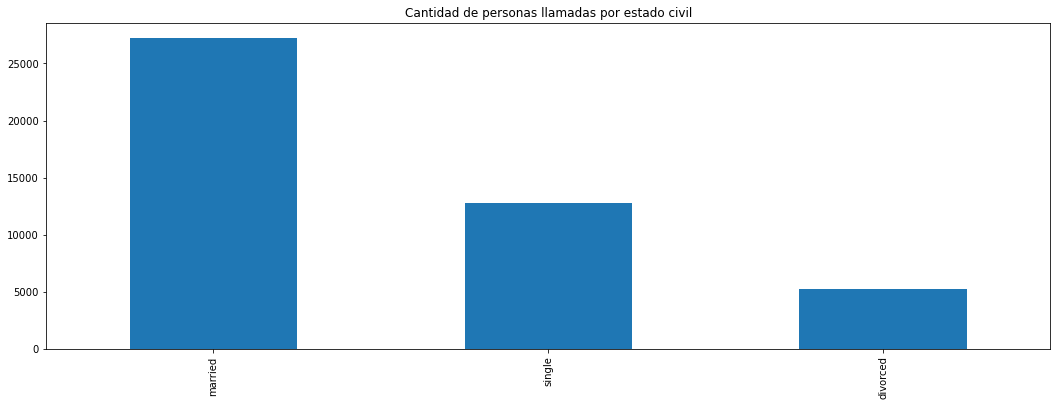

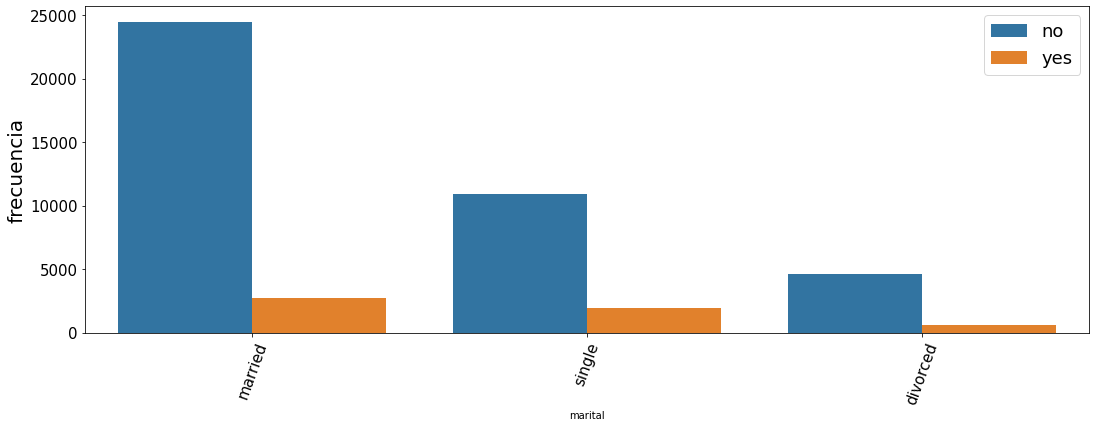

In [10]:
plt.figure(figsize=(18,6))
df['marital'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas por estado civil')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='marital', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [11]:
df_percentage(df, segregador='marital')

suscribed,no,yes,Total,No %,Yes %
marital,,,,,
single,10878,1912,12790,85.05%,14.95%
divorced,4585,622,5207,88.05%,11.95%
married,24459,2755,27214,89.88%,10.12%


Se está llamando más a las personas casadas, sin embargo, en porcentaje, se las personas solteras adquieren en mayor medida préstamos

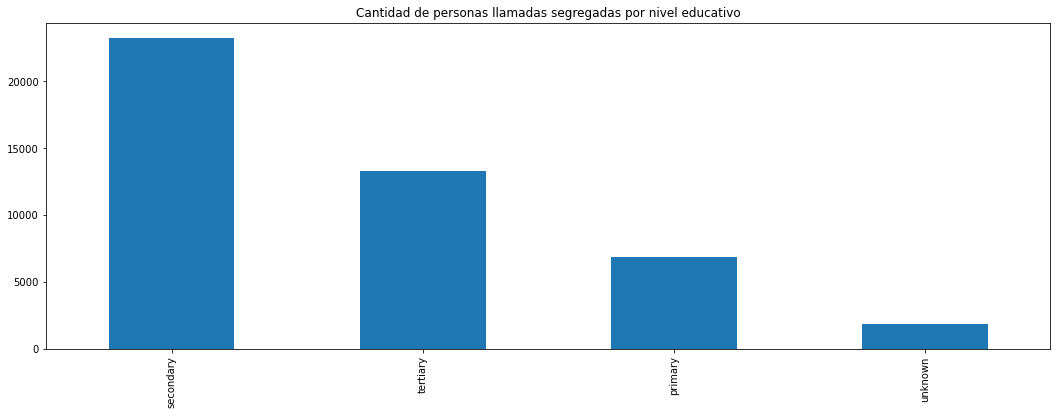

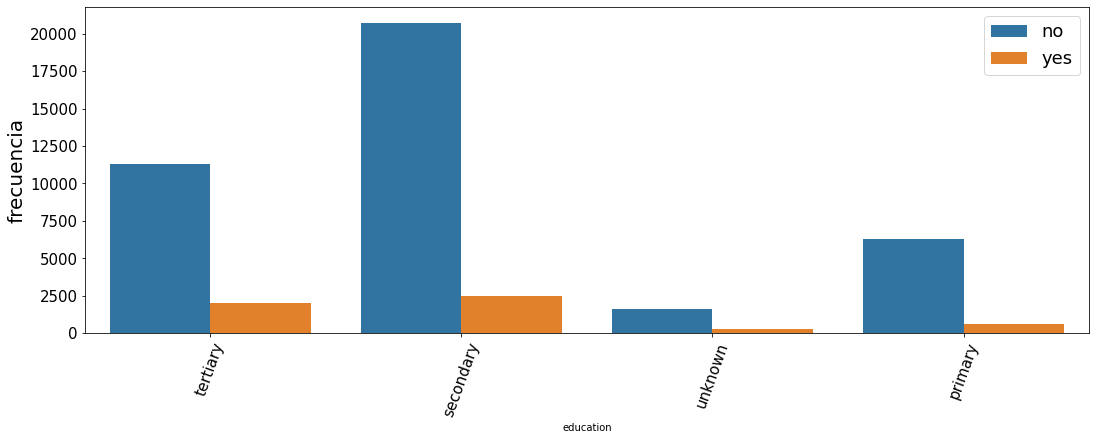

In [12]:
plt.figure(figsize=(18,6))
df['education'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas segregadas por nivel educativo')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='education', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [13]:
df_percentage(df, segregador='education')

suscribed,no,yes,Total,No %,Yes %
education,,,,,
tertiary,11305,1996,13301,84.99%,15.01%
unknown,1605,252,1857,86.43%,13.57%
secondary,20752,2450,23202,89.44%,10.56%
primary,6260,591,6851,91.37%,8.63%


Se llaman más a las personas que poseen leves estudios educativos, esto se puede correlacionar con que se llaman más a las personas desempeñadas en blue-collars (lo puedo saber con una gráfica de correlación haciendo un encoding)

Se observa que la categoría tertriary, es decir, estudios post secundarios (estudios universitarios, estudios técnicos,etc) es la que posee mayor cantidad de tasa de aceptación

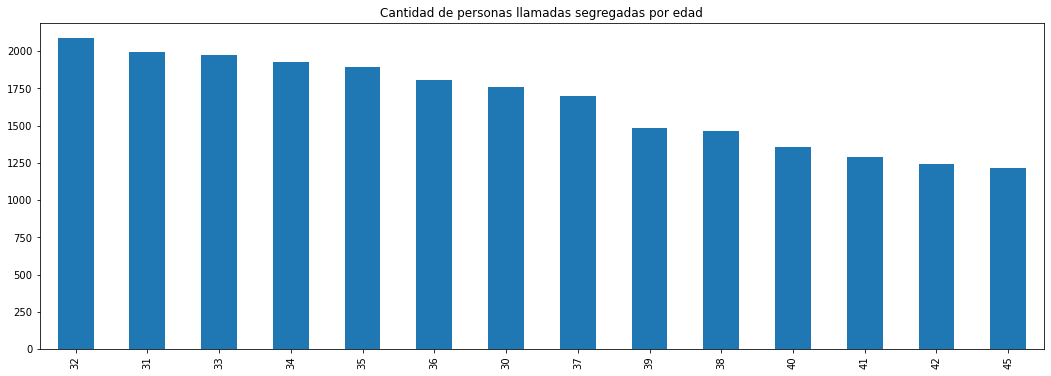

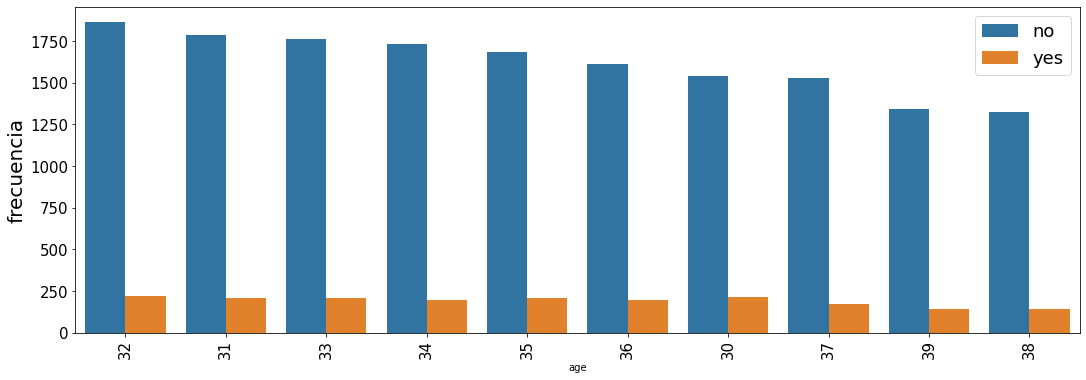

In [14]:
plt.figure(figsize=(18,6))
df['age'].value_counts().head(14).plot(kind='bar', title='Cantidad de personas llamadas segregadas por edad')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='age', hue='suscribed', data=df,
                    order=df.age.value_counts().iloc[:10].index)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

Se observa que la mayoría dae personas llamadas son personas de mediana edad

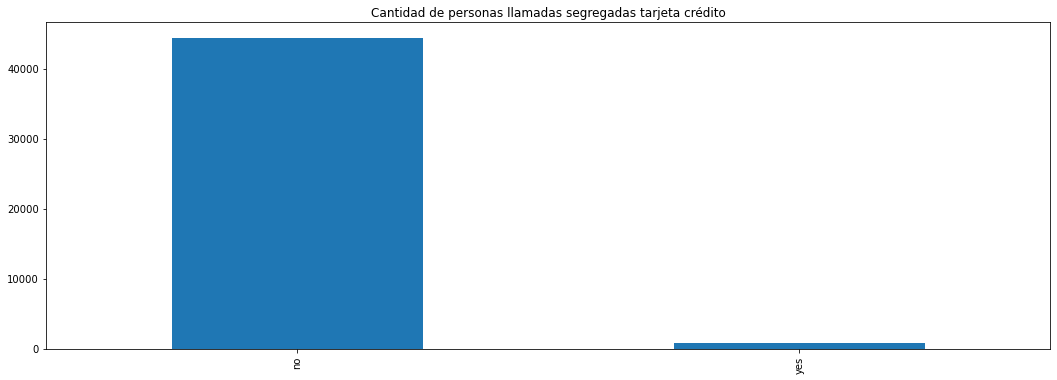

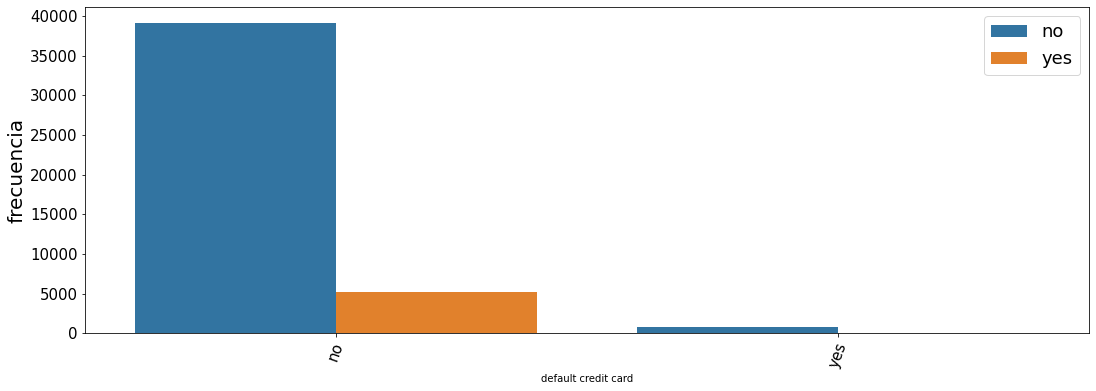

In [15]:
plt.figure(figsize=(18,6))
df['default credit card'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas segregadas tarjeta crédito')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='default credit card', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [16]:
df_percentage(df, segregador='default credit card')

suscribed,no,yes,Total,No %,Yes %
default credit card,,,,,
no,39159,5237,44396,88.20%,11.80%
yes,763,52,815,93.62%,6.38%


- Se han llamado a la mayoría de personas que no poseen una tarjeta de crédito con el banco

- En porcentaje y en número, las personas que más adquiren préstamos son los que no poseen tarjeta de crédito

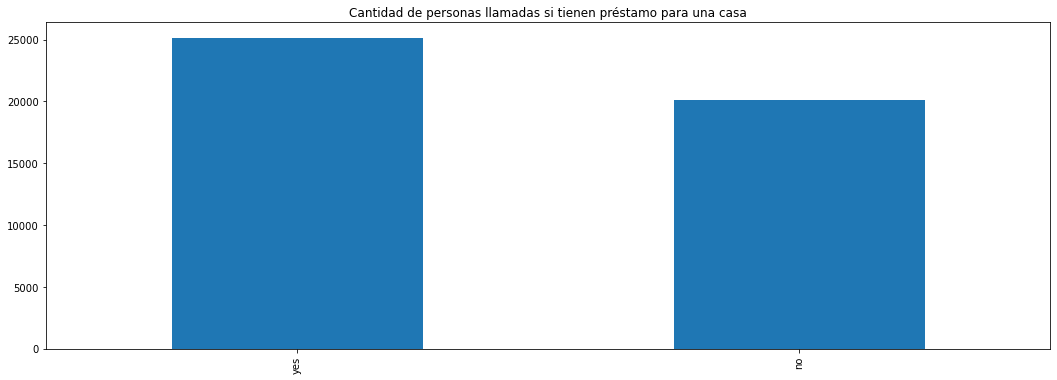

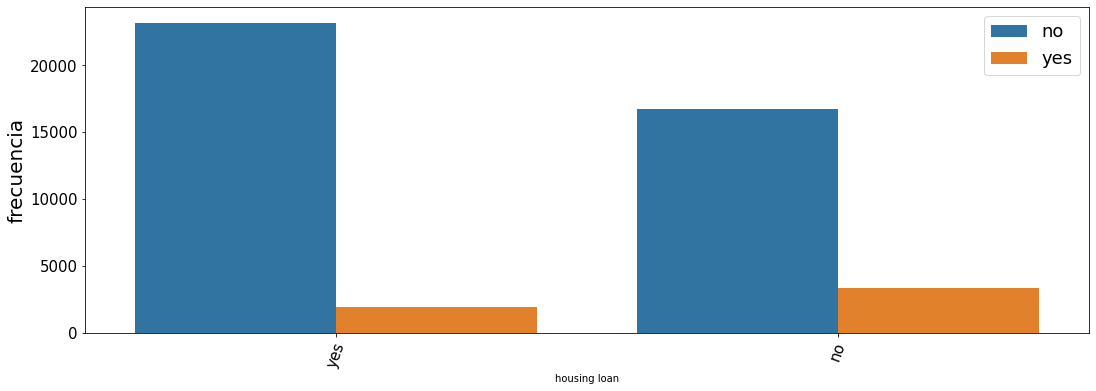

In [17]:
plt.figure(figsize=(18,6))
df['housing loan'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas si tienen préstamo para una casa')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='housing loan', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [18]:
df_percentage(df, segregador='housing loan')

suscribed,no,yes,Total,No %,Yes %
housing loan,,,,,
no,16727,3354,20081,83.30%,16.70%
yes,23195,1935,25130,92.30%,7.70%


- la mayoría de personas llamadas ya posee un préstamo de casa 

- En porcentaje y en número, las personas que más adquiren préstamos son los que no poseen préstamo para una casa (posiblemente por eso no quieran adquirir otra deuda)

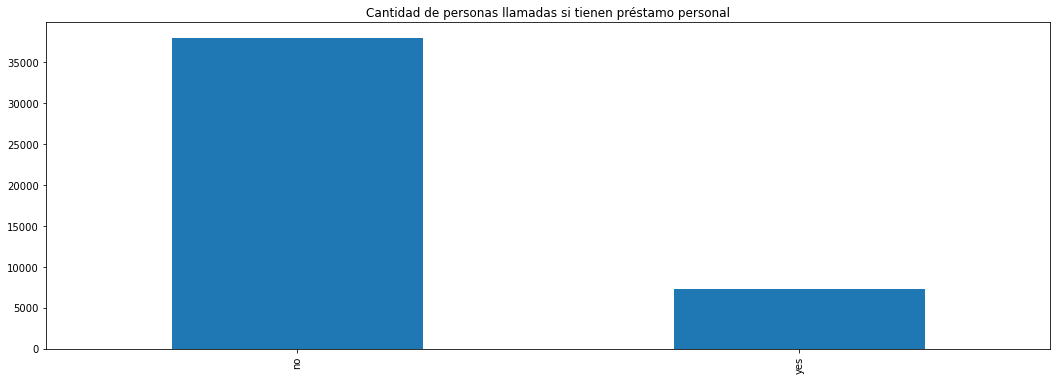

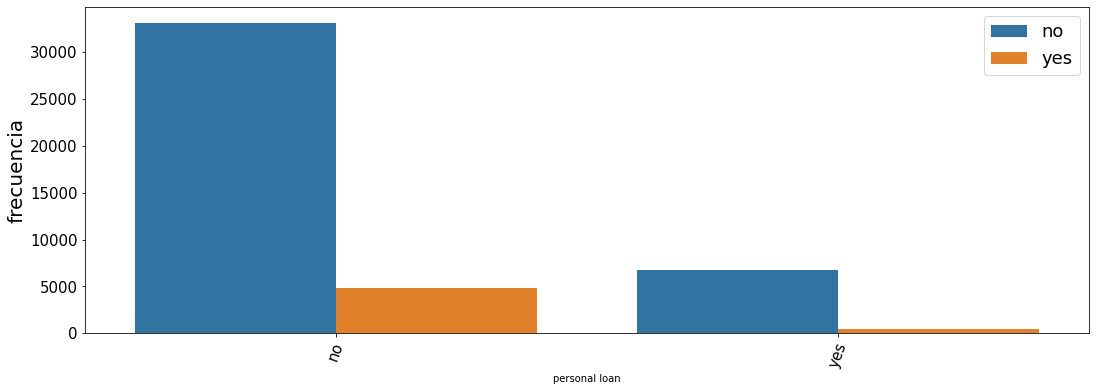

In [19]:
plt.figure(figsize=(18,6))
df['personal loan'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas si tienen préstamo personal')

plt.figure(figsize=(18,6))
chart=sns.countplot(x='personal loan', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [20]:
df_percentage(df, segregador='personal loan')

suscribed,no,yes,Total,No %,Yes %
personal loan,,,,,
no,33162,4805,37967,87.34%,12.66%
yes,6760,484,7244,93.32%,6.68%


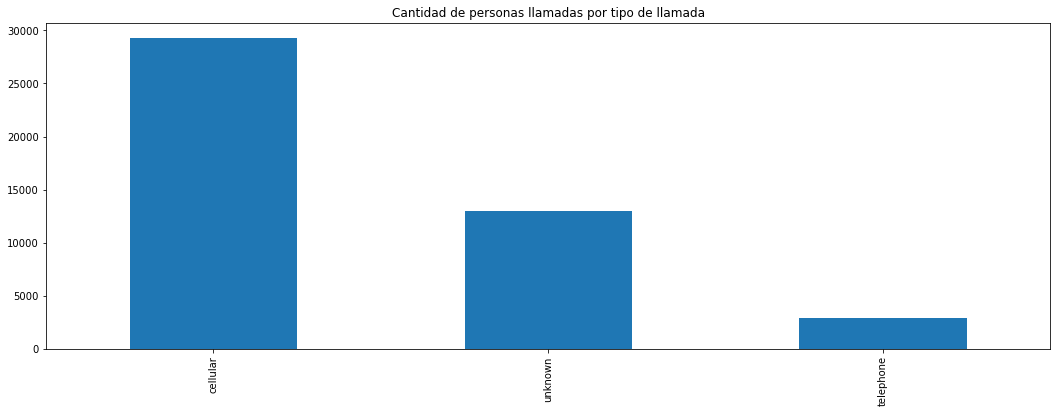

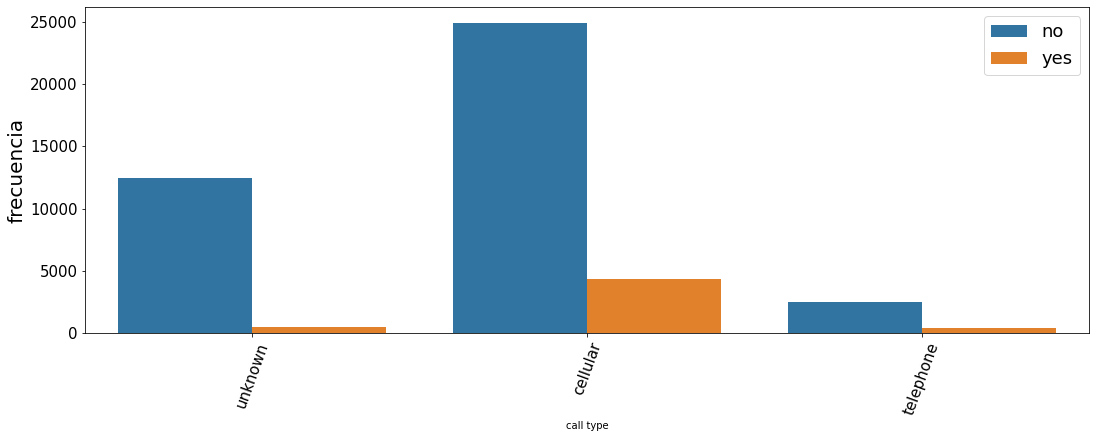

In [21]:
plt.figure(figsize=(18,6))
df['call type'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas por tipo de llamada')



plt.figure(figsize=(18,6))
chart=sns.countplot(x='call type', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [22]:
df_percentage(df, segregador='default credit card')

suscribed,no,yes,Total,No %,Yes %
default credit card,,,,,
no,39159,5237,44396,88.20%,11.80%
yes,763,52,815,93.62%,6.38%


La mayoría de personas ha contestado a través del celular. Es preocupante que no se sepa por que medio a constestado gran parte de las personas

mirar como se distribuyen en el día de acuerdo a si o no, grafica de barras

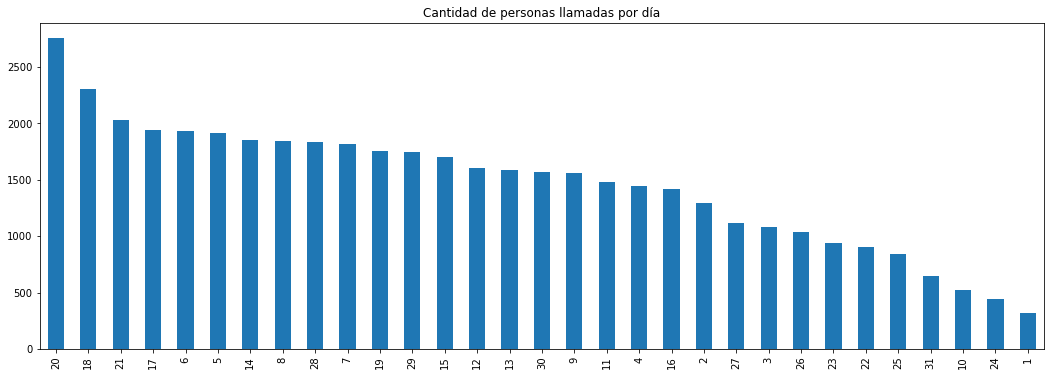

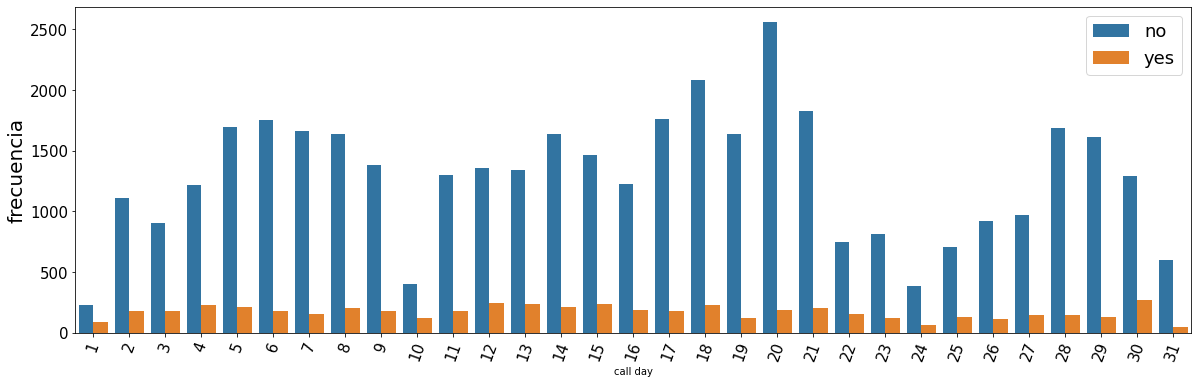

In [23]:
plt.figure(figsize=(18,6))
df['call day'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas por día')



plt.figure(figsize=(20,6))
chart=sns.countplot(x='call day', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [24]:
df_percentage(df, segregador='call day').data.head(10)

suscribed,no,yes,Total,No %,Yes %
call day,,,,,
1,232,90,322,0.720497,0.279503
10,403,121,524,0.769084,0.230916
30,1295,271,1566,0.826948,0.173052
22,751,154,905,0.829834,0.170166
3,901,178,1079,0.835032,0.164968
4,1215,230,1445,0.840830,0.159170
25,707,133,840,0.841667,0.158333
12,1359,244,1603,0.847785,0.152215
13,1344,241,1585,0.847950,0.152050


- Se ha llamado más los días 20, 18, 21. Se esperaría que estuviera uniformemente distribuida de acuerdo al día


- El día donde hubo mayor cantidad de aceptación de préstamos es el día 4


- El día donde hubo la mayor tasa de préstamos es el día 1 (28%), 10 (23%) y 30 (17%). Esto puede deberse a que tipicamente este el día de los pagos de salario

hacer una gráfica sólo con yes

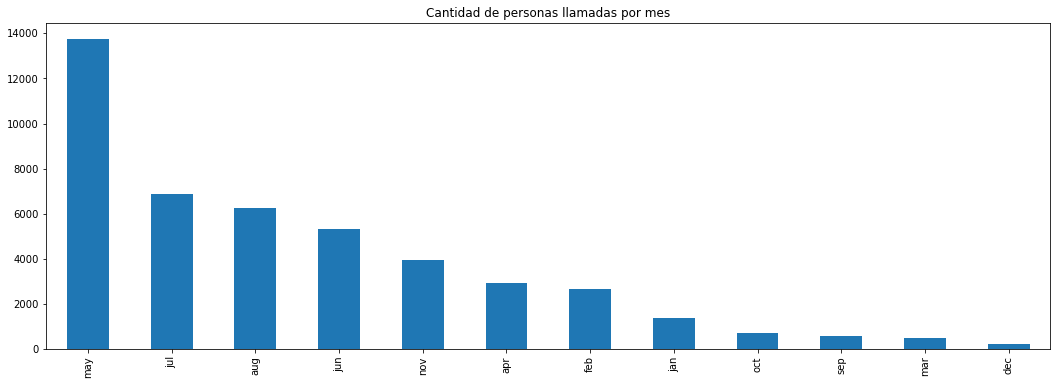

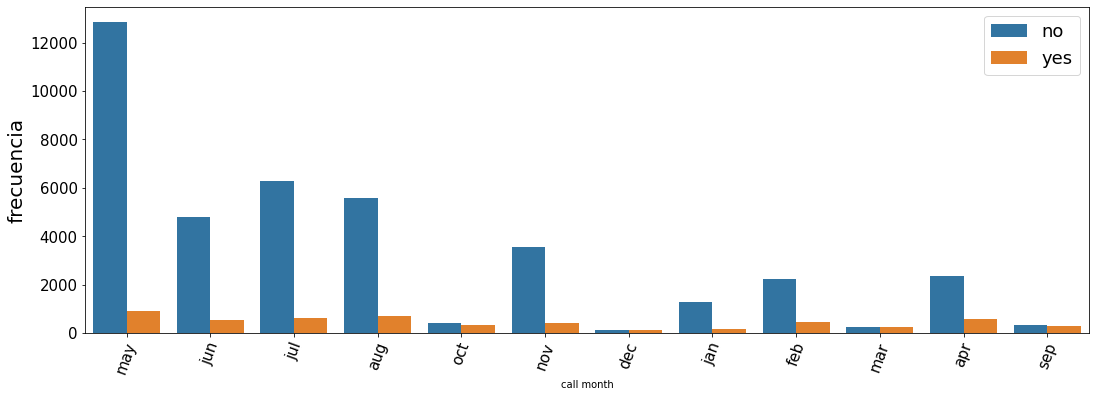

In [25]:
plt.figure(figsize=(18,6))
df['call month'].value_counts().plot(kind='bar', title='Cantidad de personas llamadas por mes')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='call month', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [26]:
df_percentage(df, segregador='call month')

suscribed,no,yes,Total,No %,Yes %
call month,,,,,
mar,229,248,477,48.01%,51.99%
dec,114,100,214,53.27%,46.73%
sep,310,269,579,53.54%,46.46%
oct,415,323,738,56.23%,43.77%
apr,2355,577,2932,80.32%,19.68%
feb,2208,441,2649,83.35%,16.65%
aug,5559,688,6247,88.99%,11.01%
jun,4795,546,5341,89.78%,10.22%
nov,3567,403,3970,89.85%,10.15%


- Se ha llamado mayormente en mayo, sin embargo, este es el mes de menor aceptación del préstamo, de tal manera que se debe de cambiar la campaña a meses como marzo donde la tasa de aceptación es mayor al 50% y meses finales del año como septimbre, octubre,diciembre.


- se esperaría que estuviera uniformemente distribuido el número de llamadas.

In [27]:
#'number of days since previous call','number of previous calls', 'suscribed']

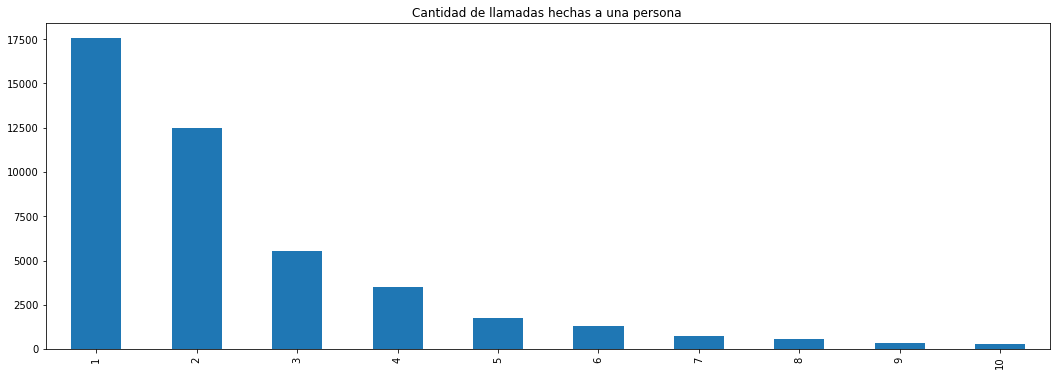

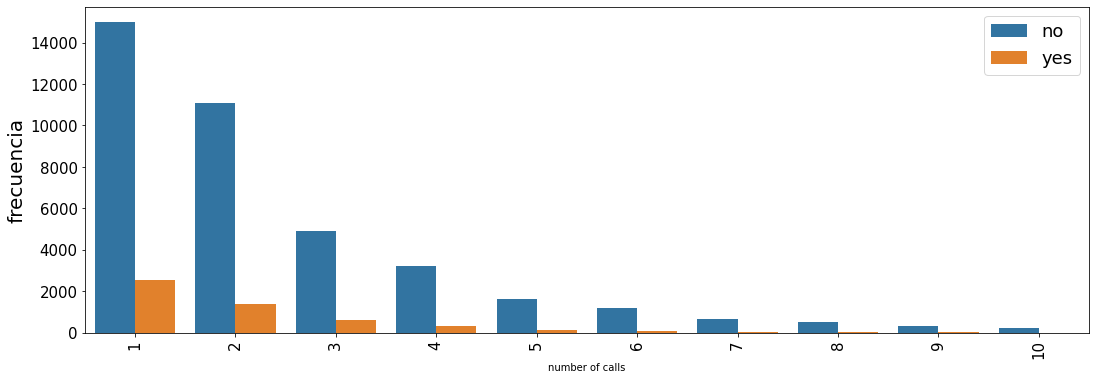

In [28]:
plt.figure(figsize=(18,6))
df['number of calls'].value_counts().head(10).plot(kind='bar', title='Cantidad de llamadas hechas a una persona ')


plt.figure(figsize=(18,6))
chart=sns.countplot(x='number of calls', hue='suscribed', data=df,
                    order=df['number of calls'].value_counts().iloc[:10].index)

chart.set_xticklabels(chart.get_xticklabels(), rotation=90);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [29]:
df_percentage(df, segregador='number of calls').data.sort_values(by=['Total'], ascending=False).head(10)

suscribed,no,yes,Total,No %,Yes %
number of calls,,,,,
1,14983,2561,17544,0.854024,0.145976
2,11104,1401,12505,0.887965,0.112035
3,4903,618,5521,0.888064,0.111936
4,3205,317,3522,0.909994,0.090006
5,1625,139,1764,0.921202,0.078798
6,1199,92,1291,0.928737,0.071263
7,688,47,735,0.936054,0.063946
8,508,32,540,0.940741,0.059259
9,306,21,327,0.935780,0.064220


Se observa que a medida que se realiza más llamadas, menor es el porcentaje de aceptación de préstamo, de tal manera que es mejor en vez de usar los recursos para llamar de nuevo, llamar a otra persona.

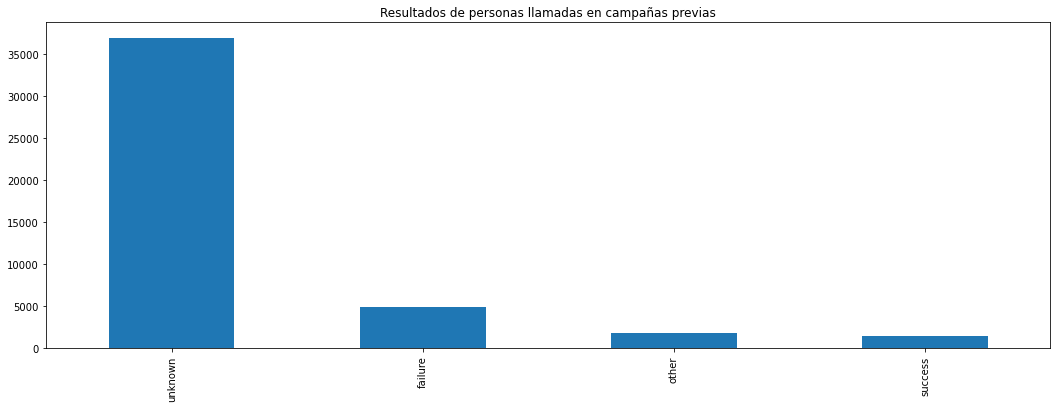

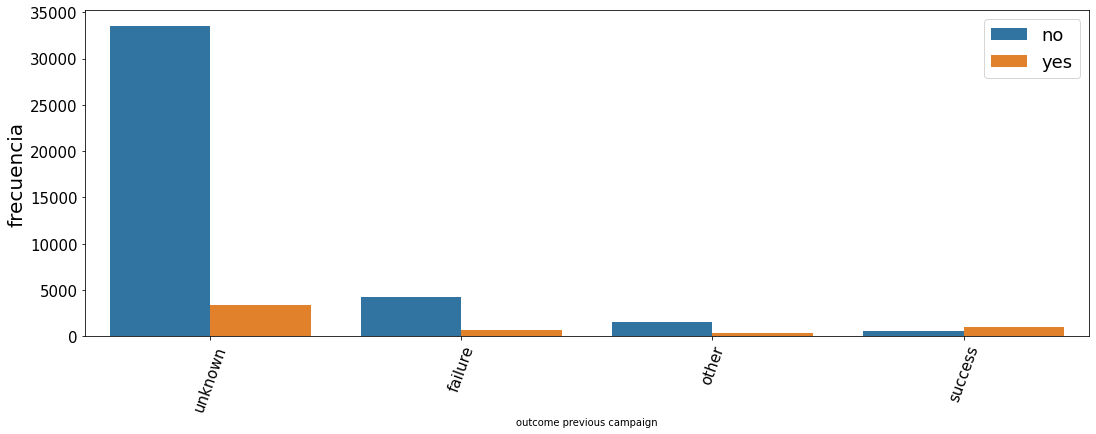

In [30]:
plt.figure(figsize=(18,6))
(df['outcome previous campaign'].value_counts()
.head(10).plot(kind='bar', title='Resultados de personas llamadas en campañas previas'))



plt.figure(figsize=(18,6))
chart=sns.countplot(x='outcome previous campaign', hue='suscribed', data=df)
chart.set_xticklabels(chart.get_xticklabels(), rotation=70);
plt.legend(loc = 'upper right', fontsize = 18)
plt.ylabel('frecuencia', fontsize = 20)
plt.xticks(fontsize= 15)
plt.yticks(fontsize= 15)
plt.show()

In [31]:
df_percentage(df, segregador='outcome previous campaign')

suscribed,no,yes,Total,No %,Yes %
outcome previous campaign,,,,,
success,533,978,1511,35.27%,64.73%
other,1533,307,1840,83.32%,16.68%
failure,4283,618,4901,87.39%,12.61%
unknown,33573,3386,36959,90.84%,9.16%


Los datos indican que se debe de focalizar en personas que anteriormente hayan obtenido un préstamo puesto que el 64% de las veces estas aceptan un nuevo préstamo.

<AxesSubplot:title={'center':'Resultados de la campaña actual'}>

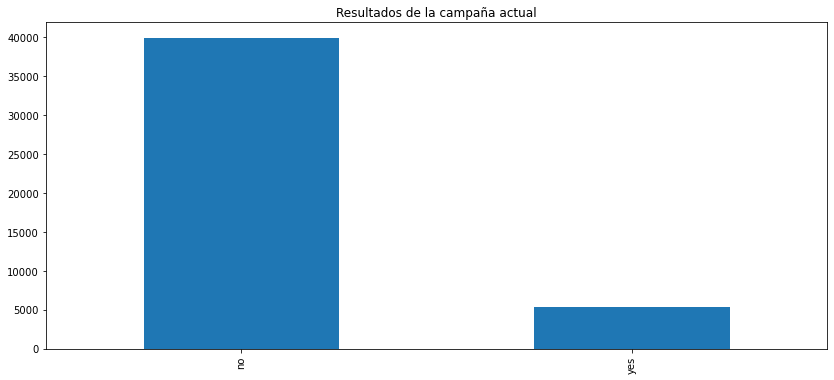

In [32]:
plt.figure(figsize=(14,6))
(df['suscribed'].value_counts()
.head(10).plot(kind='bar', title='Resultados de la campaña actual'))


Es claro que no se está realizando la estrategía de negocio más efectiva y esta es la razón por la cual existen resultados tan negativos en la aceptación de préstamo

### 2.2) Análisis variable objetivo-variables continuas

(-4000.0, 8000.0)

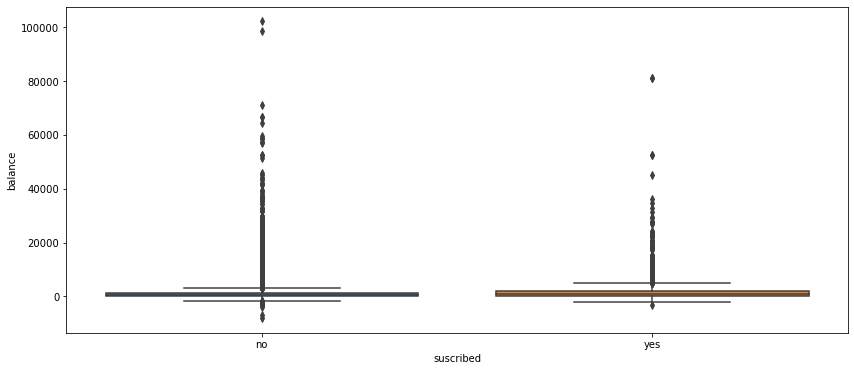

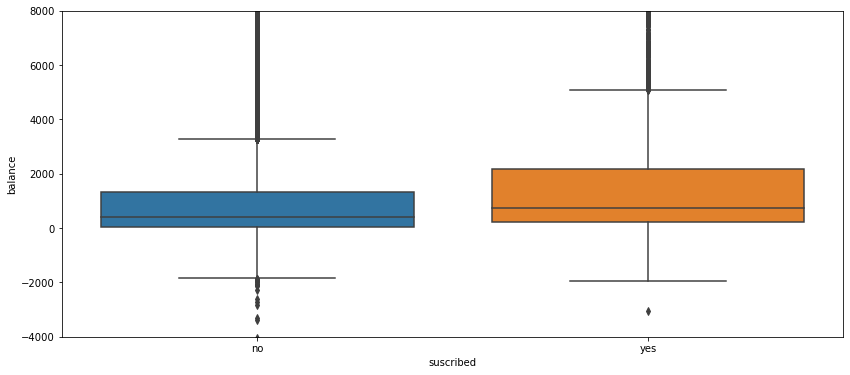

In [38]:
plt.figure(figsize=(14,6))
sns.boxplot(x='suscribed',y='balance',data=df)

plt.figure(figsize=(14,6))
sns.boxplot(x='suscribed',y='balance',data=df)
plt.ylim(-4000,8000)

- El porcentaje de préstamos aceptados está mayormente distribuido de acuerdo al salario en comparación a los no aceptados. 

- La posición de la mediana es mayor en las personas que aceptaron el préstamo en comparación a las que no lo aceptaron

(-4000.0, 8000.0)

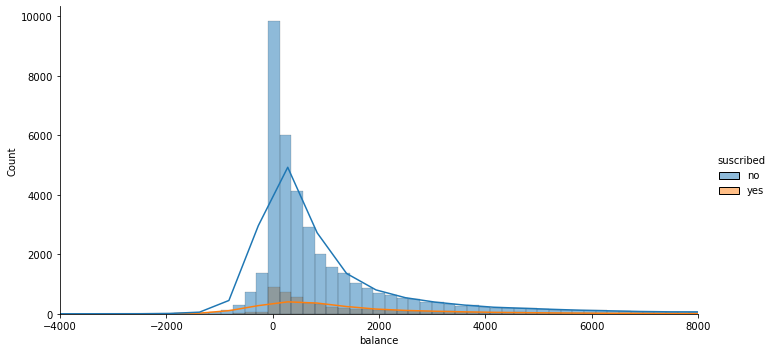

In [51]:
sns.displot(data=df, x='balance', hue='suscribed',kde=True, aspect=2, bins=500)
plt.xlim(-4000,8000)

Las distrubiciones son asimétricas de tal manera que las personas con menor salario tienden a aceptar mayormente los préstamos.

Las gráficas poseen colas bastante grandes de tal manera que se debe de aplicar una eliminación de outlier

(-10.0, 200.0)

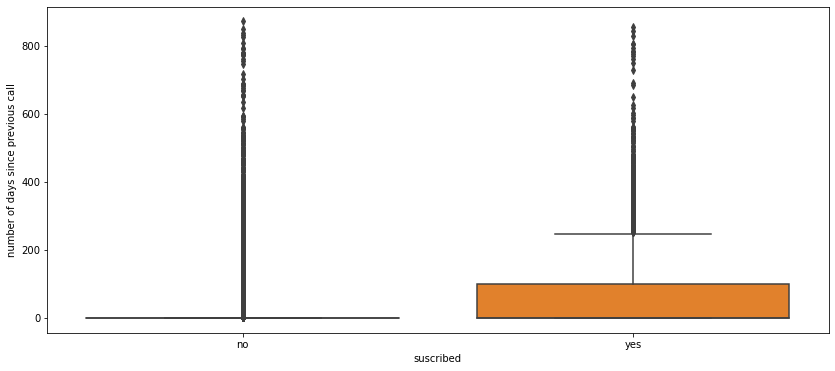

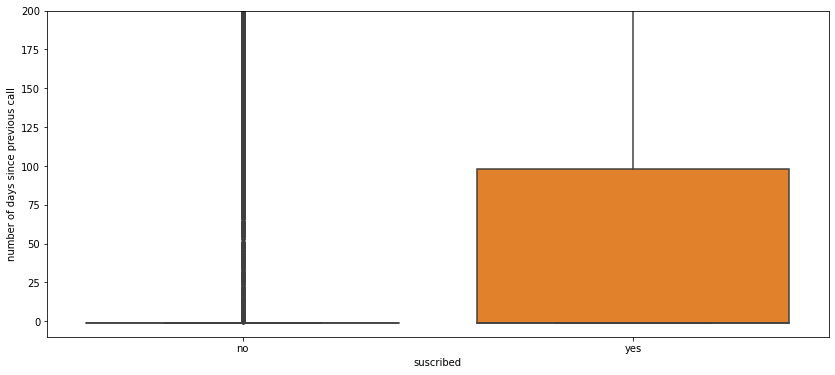

In [41]:
plt.figure(figsize=(14,6))
sns.boxplot(x='suscribed',y='number of days since previous call',data=df)

plt.figure(figsize=(14,6))
sns.boxplot(x='suscribed',y='number of days since previous call',data=df)
plt.ylim(-10, 200)

No se concluye mucho de estas gráficas, sólo que existe gran cantidad de outliers

### Encoding de variables

In [58]:
df1=df.copy()
df.tail(1)

,age,job,marital,education,default credit card,balance,housing loan,personal loan,call type,call day,call month,call duration,number of calls,number of days since previous call,number of previous calls,outcome previous campaign,suscribed
45210,37,entrepreneur,married,secondary,no,2971,no,no,cellular,17,nov,361,2,188,11,other,no


In [69]:
df['suscribed']=df['suscribed'].map({'no':0, 'yes':1})
df['default credit card']=df['default credit card'].map({'no':0, 'yes':1})
df['housing loan']=df['housing loan'].map({'no':0, 'yes':1})
df['personal loan']=df['personal loan'].map({'no':0, 'yes':1})

In [71]:
df.head()

,age,job,marital,education,default credit card,balance,housing loan,personal loan,call type,call day,call month,call duration,number of calls,number of days since previous call,number of previous calls,outcome previous campaign,suscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


<AxesSubplot:xlabel='balance', ylabel='suscribed'>

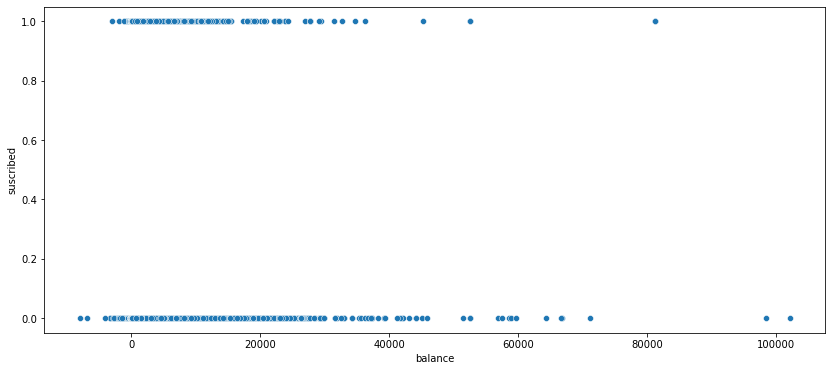

In [84]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='balance', y='suscribed', data=df)

No se observa que haya una correlación entre la aceptación de préstamo y salario, sin embargo, se puede notar que entre mayor es el salario de la persona, menor es la probabilidad de que acepte el préstamo

Text(0.5, 0, 'call duration [minutes]')

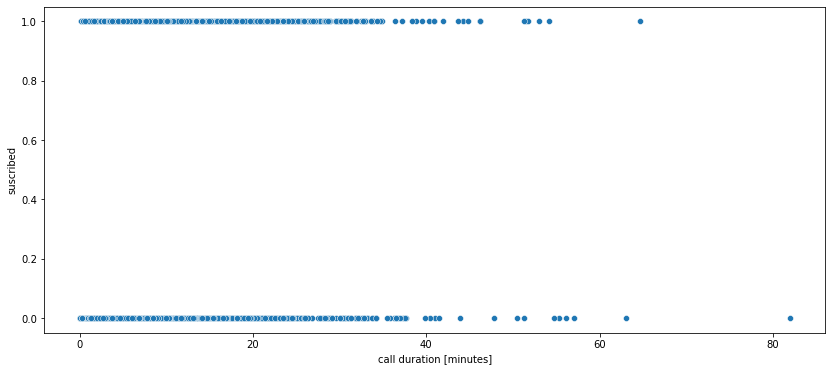

In [92]:
plt.figure(figsize=(14,6))
sns.scatterplot(x='call duration', y='suscribed', data=df)
plt.xlabel("call duration [minutes]")

In [125]:
dfYes=df[df['suscribed']==1]
dfNo=df[df['suscribed']==0]

print("porcentaje de llamadas en los primeros 10 minutos %.2f" %
      (df['call duration'][df['call duration']<10].size/df['call duration'].size))

print("porcentaje de llamadas en los primeros 20 minutos %.2f" %
      (df['call duration'][df['call duration']<20].size/df['call duration'].size))
print("\n")

print("porcentaje de llamadas exitosas en los primeros 10 minutos %.2f" %
      (dfYes['call duration'][dfYes['call duration']<10].size/dfYes['call duration'].size) )

print("porcentaje de llamadas existosas en los primeros 20 minutos %.2f" %
      (dfYes['call duration'][dfYes['call duration']<20].size/dfYes['call duration'].size))

porcentaje de llamadas en los primeros 10 minutos 0.92
porcentaje de llamadas en los primeros 20 minutos 0.99


porcentaje de llamadas exitosas en los primeros 10 minutos 0.65
porcentaje de llamadas existosas en los primeros 20 minutos 0.93


Se observa que no existe una correlación entre la duración de la llamada y la toma del préstamo

- El 91% de la toma de decisiones de las personas llamadas se da los primeros 10 minutos y el 99% entre los 20 minutos de tal manera que es ineficiente continuar llamadas tan largas

- El 93% de las llamadas exitosas se dan en los primeros 20 minutoa

<AxesSubplot:xlabel='number of days since previous call', ylabel='suscribed'>

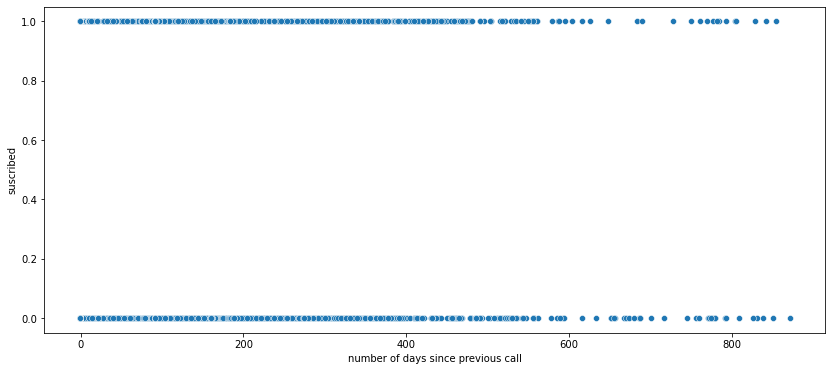

In [110]:
plt.figure(figsize=(14,6))
sns.scatterplot(y='suscribed', x='number of days since previous call', data=df)

In [131]:
etiqueta='number of days since previous call'


print("porcentaje de llamadas el la cual se habían contactado a la persona hace 100 días %.2f" %
      (df[etiqueta][df[etiqueta]<100].size/df[etiqueta].size))

print("porcentaje de llamadas el la cual se habían contactado a la persona hace 200 días %.2f" %
      (df[etiqueta][df[etiqueta]<200].size/df[etiqueta].size))
print("\n")

print("porcentaje de llamadas exitosas el la cual se habían contactado a la persona hace 100 días %.2f" %
      (dfYes[etiqueta][dfYes[etiqueta]<100].size/dfYes[etiqueta].size) )

print("porcentaje de llamadas exitosas el la cual se habían contactado a la persona hace 200 días %.2f" %
      (dfYes[etiqueta][dfYes[etiqueta]<200].size/dfYes[etiqueta].size))

porcentaje de llamadas exitosas el la cual se habían contactado a la persona hace 100 días 0.85
porcentaje de llamadas exitosas el la cual se habían contactado a la persona hace 200 días 0.91


porcentaje de llamadas exitosas el la cual se habían contactado a la persona hace 100 días 0.76
porcentaje de llamadas exitosas el la cual se habían contactado a la persona hace 200 días 0.90


Se observa que el 91% de llamadas se realizan luego de 200 días de haber contactado al cliente y que el 90% de las personas que van a aceptar el préstamo están dentro de estos días de tal manera que no es necesario seguir realizando llamadas en lapsos más grandes

<AxesSubplot:xlabel='number of calls', ylabel='suscribed'>

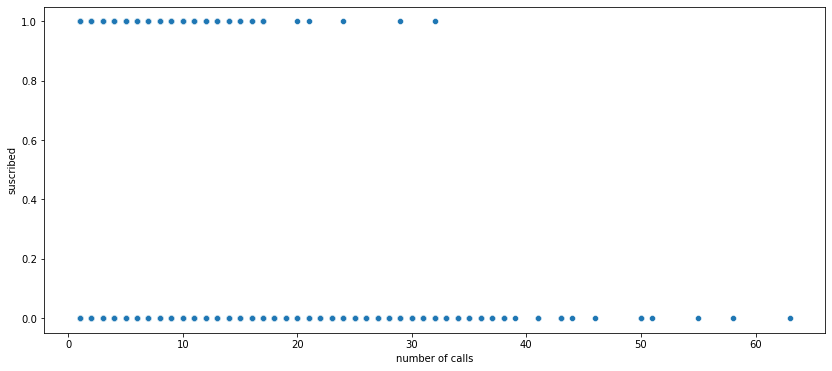

In [134]:
plt.figure(figsize=(14,6))
sns.scatterplot(y='suscribed', x='number of calls', data=df)

In [140]:
etiqueta='number of calls'


print("porcentaje de llamadas el la cual se habían contactado a la persona 5 veces antes %.2f" %
      (df[etiqueta][df[etiqueta]<5].size/df[etiqueta].size))

print("porcentaje de llamadas el la cual se habían contactado a la persona 10 veces antes %.2f" %
      (df[etiqueta][df[etiqueta]<10].size/df[etiqueta].size))
print("\n")

print("porcentaje de llamadas exitosas el la cual se habían contactado a la persona 5 veces antes %.2f" %
      (dfYes[etiqueta][dfYes[etiqueta]<5].size/dfYes[etiqueta].size) )

print("porcentaje de llamadas exitosas el la cual se habían contactado a la persona 10 veces antes %.2f" %
      (dfYes[etiqueta][dfYes[etiqueta]<10].size/dfYes[etiqueta].size))

porcentaje de llamadas el la cual se habían contactado a la persona 5 veces antes 0.86
porcentaje de llamadas el la cual se habían contactado a la persona 10 veces antes 0.97


porcentaje de llamadas exitosas el la cual se habían contactado a la persona 5 veces antes 0.93
porcentaje de llamadas exitosas el la cual se habían contactado a la persona 10 veces antes 0.99


No es necesario seguir llamando a la persona luego de 10 veces puesto que según los datos,el 93% de las personas que aceptaron el préstamo lo aceptaron antes de las 5 llamadas y 99% antes de las 10 llamadas, de tal manera que el banco está perdiendo capital al focalizarse en seguir llamando luego de las 10 veces

#### Matriz de correlación 

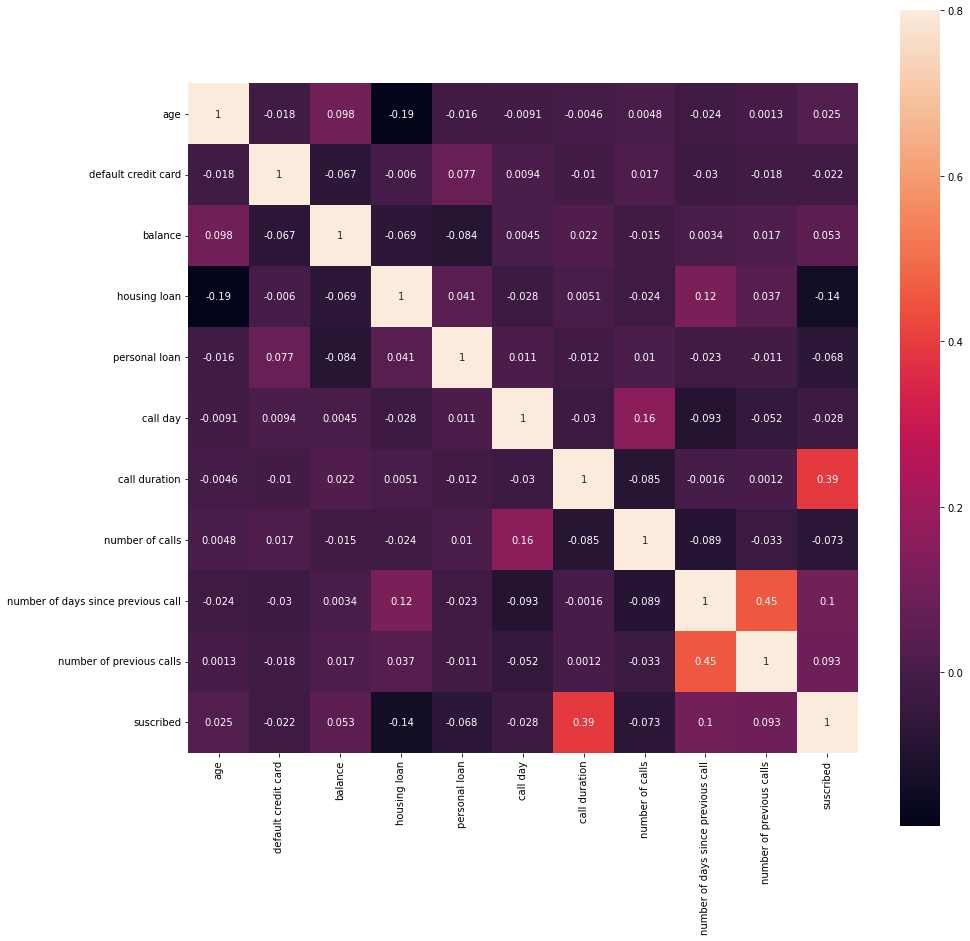

In [146]:
corrmat = df.corr()
f, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corrmat, vmax=.8, square=True, annot=True);

Se observa que las variables están poco correlacionadas de tal manera que no hay necesidad de descartan alguna columna por alto valor de correlación

## 3) Imputación de datos faltantes

In [143]:
df.tail()

,age,job,marital,education,default credit card,balance,housing loan,personal loan,call type,call day,call month,call duration,number of calls,number of days since previous call,number of previous calls,outcome previous campaign,suscribed
45206,51,technician,married,tertiary,0,825,0,0,cellular,17,nov,16.283333,3,-1,0,unknown,1
45207,71,retired,divorced,primary,0,1729,0,0,cellular,17,nov,7.600000,2,-1,0,unknown,1
45208,72,retired,married,secondary,0,5715,0,0,cellular,17,nov,18.783333,5,184,3,success,1
45209,57,blue-collar,married,secondary,0,668,0,0,telephone,17,nov,8.466667,4,-1,0,unknown,0
45210,37,entrepreneur,married,secondary,0,2971,0,0,cellular,17,nov,6.016667,2,188,11,other,0


In [67]:
df['outcome previous campaign'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: outcome previous campaign, dtype: int64

In [68]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

## 4) Transformación de variables

## 5) Selección de variables para el modelo

## 6) Modelos